# Purpose: -	Build a solution in the programming language  (Python) that predicts if the patients will suffer from stroke or not 


Anonymized dataset contains a record of 43401 patients and each of them is described by a following set of variables:

•	ID – Unique Identification Number

•	Gender – categorical variable (Male, Female, Other)

•	Age_In_Days – indicates patient’s age in days

•	Hypertension – binominal variable (1 – patient has hypertension, 0 – patient without hypertension)

•	Heart_Disease – binominal variable (1 – patient has heart disease, 0 – patient without heart disease)

•	Ever_Married – binominal variable (Yes – patient is (was ever) married, No – patient has never been married)

•	Type_Of_Work – categorical variable related to different working status (patient is self-employed, works in a private firm, has a government job, never worked or is still a child)

•	Residence – binominal variable (Urban – patient currently lives in urban area, Rural – patient currently lives in rural area)

•	Avg_Glucose – patient’s average glucose level for the past 3 months

•	BMI – patient’s current BMI score

•	Smoking_Status – categorical variable that indicates patient smoking habits

•	Stroke – binominal target variable (1 – patient after stroke, 0 – patient never had stroke)


#### Features description

Categorical features:
Gender,
Type_Of_Work,
Smoking_Status

Continuous features (Variable taking values between any two points or between the minimum or maximum values in the feature column):
Age_In_Days,
Avg_Glucose,
BMI

Ordinal features (Variable having relative ordering or sorting between the values): 
Hypertension
Heart_Disease,
Ever_Married,
Residence


In [66]:
# import libraries

# data analysis, splitting and wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [67]:
# loading data

#df1 = pd.read_csv("Stroke_Prediction.csv", header=None, na_values=['None'])
df1 = pd.read_excel('Stroke_Prediction.xlsx', index_col=0)

print("Number of records: {}\nNumber of variables: {}".format(df1.shape[0], df1.shape[1]))

# display the first 3 lines
df1.head(3)

Number of records: 43400
Number of variables: 11


,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Stroke
ID,,,,,,,,,,,
31153,Male,1104.0,0,0,No,children,Rural,95.12,18.0,NaN,0
30650,Male,21204.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
17412,Female,2928.0,0,0,No,Private,Urban,110.89,17.6,NaN,0


In [68]:
# Normalizing data to avoid having text or missing information instead of numeric values in each variable
df1.Gender[df1.Gender == 'Male'] = 0
df1.Gender[df1.Gender == 'Female'] = 1
df1.Gender[df1.Gender == 'Other'] = 2

df1.Ever_Married[df1.Ever_Married == 'Yes'] = 0
df1.Ever_Married[df1.Ever_Married == 'No'] = 1

df1.Type_Of_Work[df1.Type_Of_Work == 'children'] = 0
df1.Type_Of_Work[df1.Type_Of_Work == 'Govt_job'] = 1
df1.Type_Of_Work[df1.Type_Of_Work == 'Never_worked'] = 2
df1.Type_Of_Work[df1.Type_Of_Work == 'Private'] = 3
df1.Type_Of_Work[df1.Type_Of_Work == 'Self-employed'] = 4

df1.Residence[df1.Residence == 'Rural'] = 0
df1.Residence[df1.Residence == 'Urban'] = 1

df1.Smoking_Status[df1.Smoking_Status == 'formerly smoked'] = 0
df1.Smoking_Status[df1.Smoking_Status == 'never smoked'] = 1
df1.Smoking_Status[df1.Smoking_Status == 'smokes'] = 2


f:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
f:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
f:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
f:\Users\User\Anaconda3\lib\site

In [69]:
# show columns having missing values
df1.isnull().sum()

Gender                0
Age_In_Days           0
Hypertension          0
Heart_Disease         0
Ever_Married          0
Type_Of_Work          0
Residence             0
Avg_Glucose           0
BMI                1462
Smoking_Status    13292
Stroke                0
dtype: int64

We should consider few solutions. For sure we need to do something with missing data. When we leave "Nan" information it will cause an issue in near future during further analysis and prediction.
We could remove raws with missing values, however when we look at the variable with smoking_status there is almost 1/3 missing values comparing to volume of dataset. We do not want to lost so much data, so the best way is to replace missing values with mean or change to the most common value.

In [70]:
# Decision is to fill missing values with mode
df1['Smoking_Status'].fillna(df1['Smoking_Status'].mode()[0], inplace=True)
df1['BMI'].fillna(df1['BMI'].mode()[0], inplace=True)

In [71]:
df1.head(4)

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Stroke
ID,,,,,,,,,,,
31153,0,1104.0,0,0,1,0,0,95.12,18.0,1,0
30650,0,21204.0,1,0,0,3,1,87.96,39.2,1,0
17412,1,2928.0,0,0,1,3,1,110.89,17.6,1,0
57008,1,25578.0,0,0,0,3,0,69.04,35.9,0,0


In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43400 entries, 31153 to 36610
Data columns (total 11 columns):
Gender            43400 non-null object
Age_In_Days       43400 non-null float64
Hypertension      43400 non-null int64
Heart_Disease     43400 non-null int64
Ever_Married      43400 non-null object
Type_Of_Work      43400 non-null object
Residence         43400 non-null object
Avg_Glucose       43400 non-null float64
BMI               43400 non-null float64
Smoking_Status    43400 non-null int64
Stroke            43400 non-null int64
dtypes: float64(3), int64(4), object(4)
memory usage: 4.0+ MB


In [73]:
# finding out what variables are numeric and checking which are categorical ones
numeric_columns = ['Age_In_Days', 'Avg_Glucose', 'BMI']

categorical_columns = [c for c in df1.columns if c not in numeric_columns]

print(categorical_columns)

['Gender', 'Hypertension', 'Heart_Disease', 'Ever_Married', 'Type_Of_Work', 'Residence', 'Smoking_Status', 'Stroke']


# Identyfing data dependency and patterns

Exploring data dependency can help choose the best model and metrics in further analysis.

In [74]:
# count values of our target variable
df1.Stroke.value_counts()

0    42617
1      783
Name: Stroke, dtype: int64

Result shows us that 42617 patients never had a stroke and only about 2% of people are after stroke.

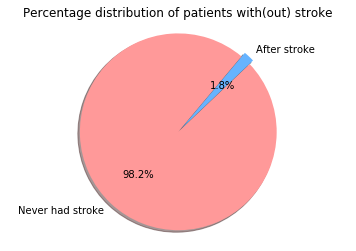

In [75]:
# Present result on pie chart, where the slices will be ordered
labels = 'Never had stroke','After stroke'
sizes = df1['Stroke'].value_counts()
explode = (0, 0.05,)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
colors = ['#ff9999','#66b3ff']
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=bool, startangle=50, colors=colors)
ax1.axis('equal')  # It ensures us that pie is drawn as a circle.
plt.title("Percentage distribution of patients with(out) stroke")

plt.show()

### Checking outliers occurrence

It is really important to check whether any outliers exist and have significant impact on analysis. Sometime it is just extra large value, but it is also well known as simply wrong input made by mistake by person preparing data for analysis.

In [76]:
df1[numeric_columns].describe()

,Age_In_Days,Avg_Glucose,BMI
count,43400.000000,43400.000000,43400.000000
mean,15446.234931,104.482750,28.574551
std,8334.882942,43.111751,7.639769
min,-16381.000000,55.000000,10.100000
25%,8789.000000,77.540000,23.400000
50%,16074.000000,91.580000,27.700000
75%,21923.250000,112.070000,32.600000
max,264301.000000,291.050000,97.600000


As we can see first variable minimum and maximum values are odd. First of all we should not have any negative numbers and also number of days should be maximally 36500. Here we have 7 times more. We should limit dataset and remove negative numbers and these rows for which Age_In_Days variable contain greater than 36500 value.

Also it is quite strange that BMI has maximum value equal to almost 100. Normally scale ends with approximately 60. Since there is only few records greater than 70 I considered to also removed these lines where limit has been exceeded.

In [77]:
# Leave these data where values are greater than 0 and less that 36500, which means that we leave patient in age
# between (0,100)
df2 = df1[(df1['Age_In_Days'] > 0) & (df1['Age_In_Days'] < 36500)]

In [78]:
# Leave these data where values are greater than 0 and less that 36500, which means that we leave patient in age
# between (0,100)
df3 = df2[(df2['BMI'] < 70)]

In [79]:
df3.head(5)

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Stroke
ID,,,,,,,,,,,
31153,0,1104.0,0,0,1,0,0,95.12,18.0,1,0
30650,0,21204.0,1,0,0,3,1,87.96,39.2,1,0
17412,1,2928.0,0,0,1,3,1,110.89,17.6,1,0
57008,1,25578.0,0,0,0,3,0,69.04,35.9,0,0
46657,0,5128.0,0,0,1,2,0,161.28,19.1,1,0


In [80]:
df3[numeric_columns].describe()

,Age_In_Days,Avg_Glucose,BMI
count,43377.000000,43377.000000,43377.000000
mean,15436.108537,104.477370,28.554501
std,8220.685960,43.099279,7.568790
min,30.200000,55.000000,10.100000
25%,8789.000000,77.540000,23.400000
50%,16075.000000,91.580000,27.700000
75%,21923.000000,112.060000,32.600000
max,29980.000000,291.050000,69.800000


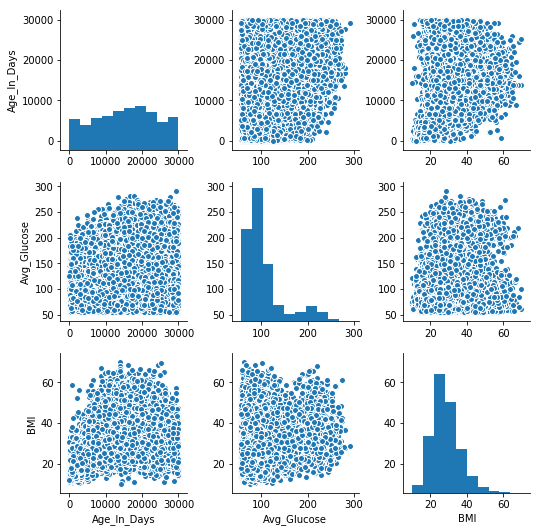

In [81]:
# create a pairplot
sns.pairplot(df3[numeric_columns])
plt.show()

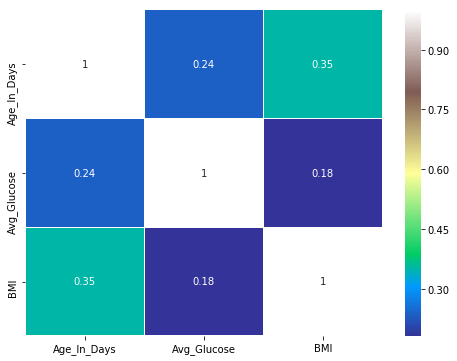

In [82]:
# create a correlation heatmap
sns.heatmap(df3[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

f:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


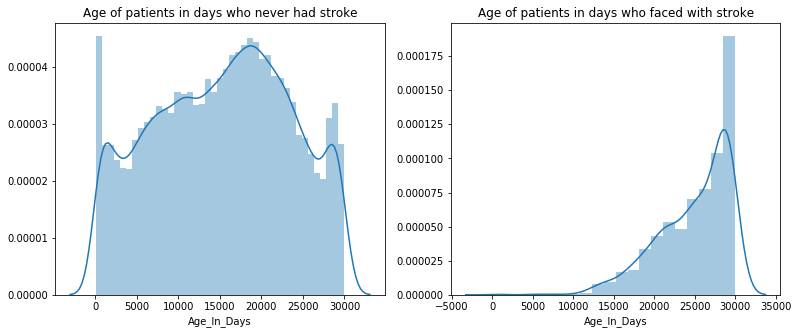

In [83]:
# create distribution of choosen variable
plt.figure(figsize=(13,11))
plt.subplot(221)
sns.distplot(df3[df3['Stroke']==0].Age_In_Days)
plt.title('Age of patients in days who never had stroke')

plt.subplot(222)
sns.distplot(df3[df3['Stroke']==1].Age_In_Days)
plt.title('Age of patients in days who faced with stroke')

plt.show()

Looking at this comparison we can simply evaluate that the most common group who faced with stroke are these between 76 and 82 years old.

It is also worth to emphasize that the youngest patients have really high index of non stroke. The right chart helps us to identify that the older the patient is, the more likely the risk of a stroke we identify.

f:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Level of average glucose patients who had stroke')

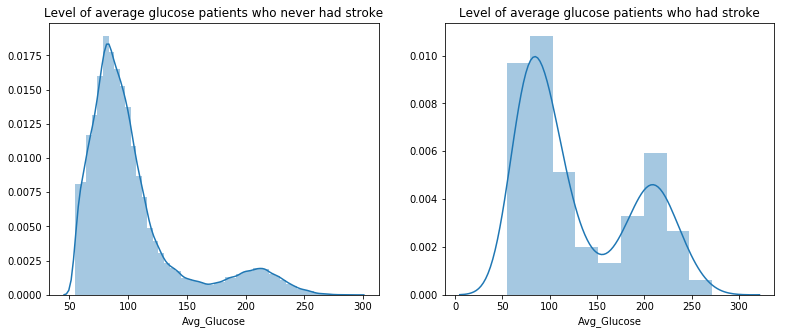

In [84]:
plt.figure(figsize=(13,11))
plt.subplot(223)
sns.distplot(df3[df3['Stroke']==0].Avg_Glucose)
plt.title('Level of average glucose patients who never had stroke')
plt.subplot(224)
sns.distplot(df3[df3['Stroke']==1].Avg_Glucose)
plt.title('Level of average glucose patients who had stroke')

Patients who have not so far been suffer because of stroke have about up to 100mg/dL average gluocse, which is a norm. Situation seems to be slightly changing when we look at chart on the right side. 
It is worth to add it that on the right side chart we have different scale. Percentage of patients with average glucose up to 100 is lower and monitored persons with level of glucose higher that 200 are more vulnerable to have a stroke in the future.

### Categorical features

Analyze how big impact has particular categorical feature which we will include in model.

###### Gender

In [85]:
#Estimate how many people faced with stroke grouped by gender
df3.groupby(['Gender','Stroke'])['Stroke'].count()

Gender  Stroke
0       0         17361
        1           352
1       0         25222
        1           431
2       0            11
Name: Stroke, dtype: int64

In [86]:
df3.groupby(['Gender','Stroke'])

f:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


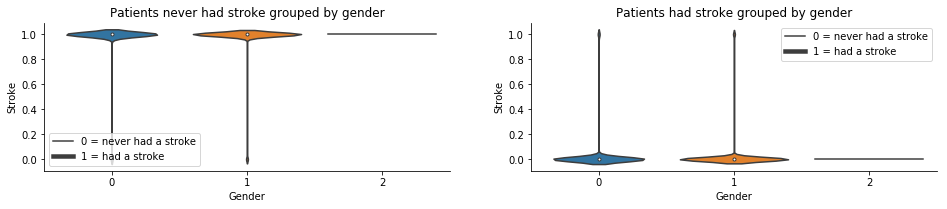

In [87]:
plt.figure(figsize=(16,6))
plt.subplot(221)
plt.title('Patients never had stroke grouped by gender')
sns.violinplot(df3['Gender'], df3['Stroke']==0)
plt.legend(['0 = never had a stroke', '1 = had a stroke'])
plt.subplot(222)
plt.title('Patients had stroke grouped by gender')
sns.violinplot(df3['Gender'], df3['Stroke']==1)
plt.legend(['0 = never had a stroke', '1 = had a stroke'])

sns.despine()

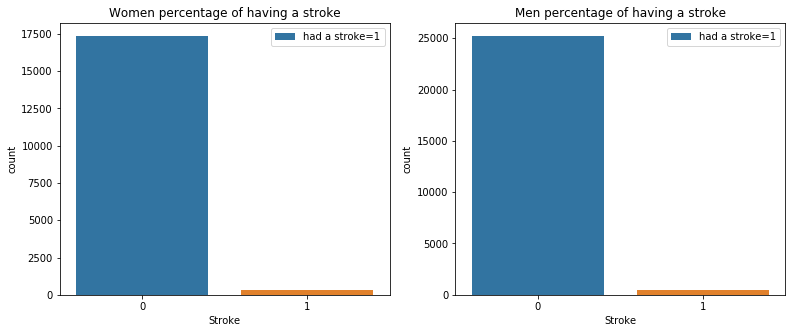

In [88]:
plt.figure(figsize=(13,11))
plt.subplot(221)
sns.countplot(df3[df3['Gender']==0].Stroke)
plt.title('Women percentage of having a stroke')
plt.legend(['had a stroke=1', 'never had a stroke=0'])

plt.subplot(222)
sns.countplot(df3[df3['Gender']==1].Stroke)
plt.title('Men percentage of having a stroke')
plt.legend(['had a stroke=1', 'never had a stroke=0'])


Based on charts we can observe that there is no too much dependency between sex and potential risk having a stroke. 

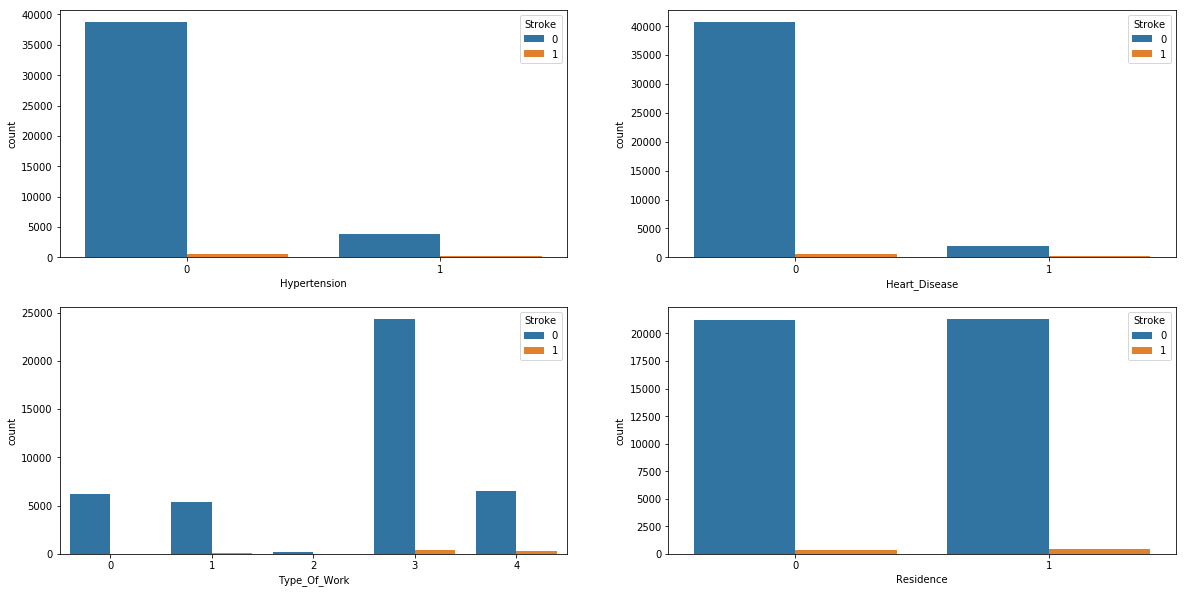

In [89]:
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.countplot(x="Hypertension", hue='Stroke', data=df3)

plt.subplot(222)
sns.countplot(x="Heart_Disease", hue='Stroke', data=df3)

plt.subplot(223)
sns.countplot(x="Type_Of_Work", hue='Stroke', data=df3)

plt.subplot(224)
sns.countplot(x="Residence", hue='Stroke', data=df3)


plt.show()


###### Checking whether smoking_status has an impact

f:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


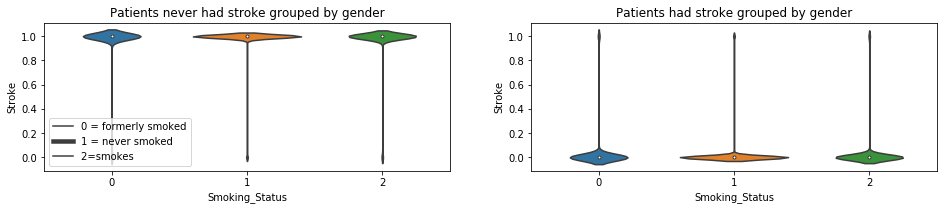

In [90]:
plt.figure(figsize=(16,6))
plt.subplot(221)
plt.title('Patients never had stroke grouped by gender')
sns.violinplot(df3['Smoking_Status'], df3['Stroke']==0)
plt.legend(['0 = formerly smoked', '1 = never smoked' , '2=smokes '])
plt.subplot(222)
plt.title('Patients had stroke grouped by gender')
sns.violinplot(df3['Smoking_Status'], df3['Stroke']==1)

Based on a plots we can say that people with label="1", which means that patients who never smoked are the largest group. According to this we can conclude that smoking is one of the factor contributing to have a stroke.

# Building a solution 

Aim of building and choose proper model is to help  VU University Medical Center save many lives. Thanks to well-prepared model hospital would have a posibillity to identify patients with high risk of stroke and sent them for proper treatment.

In [91]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):

# instantiate model
    model = classifier(**kwargs)
    
#train model
    model.fit(X_train,y_train)
    
# check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
        
    return model

In [92]:
# extract the target variable
X, y = df3.iloc[:, :-1], df3.iloc[:, -1]
print(X.shape)
print(y.shape)

(43377, 10)
(43377,)


In [93]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3419)
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (30363, 10)
train_set_y shape: (30363,)
test_set_x shape: (13014, 10)
test_set_y shape: (13014,)


In [94]:
# scale feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###### K-NN 

In [95]:
#Initialize an empty list
error = []

model = train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier)

# Calculating test accuracy in established K number between 1 to 36
for i in range(1, 36):  
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Train accuracy: 98.19%
Test accuracy: 98.19%


Text(0,0.5,'Mean error')

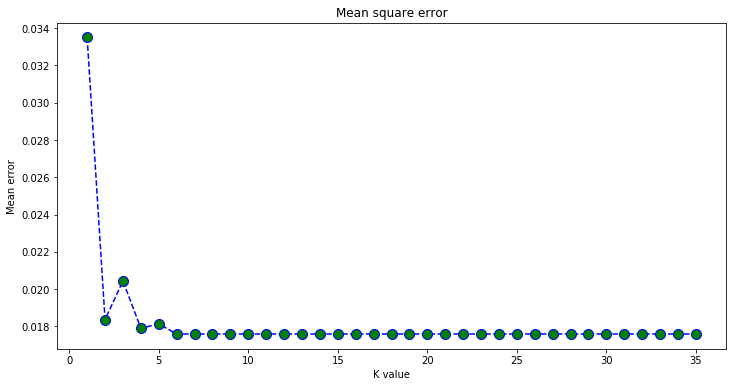

In [96]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 36), error, color='blue', linestyle='dashed', marker='o',  
         markerfacecolor='green', markersize=10)
plt.title('Mean square error')  
plt.xlabel('K value')  
plt.ylabel('Mean error')

In [97]:
# KNN
model = train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier)

Train accuracy: 98.19%
Test accuracy: 98.19%


In [98]:
# Seek optimal 'n_neighbours' parameter
for i in range(1,7):
    print("n_neigbors = "+str(i))
    train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 96.65%
n_neigbors = 2
Train accuracy: 98.31%
Test accuracy: 98.16%
n_neigbors = 3
Train accuracy: 98.30%
Test accuracy: 97.96%
n_neigbors = 4
Train accuracy: 98.17%
Test accuracy: 98.21%
n_neigbors = 5
Train accuracy: 98.19%
Test accuracy: 98.19%
n_neigbors = 6
Train accuracy: 98.17%
Test accuracy: 98.24%


Based on plot and accuracy testing we could suggest to choose K=4 with model accuracy on 98,21%.

In [99]:
model = train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier, n_neighbors=4)

Train accuracy: 98.17%
Test accuracy: 98.21%


In [ ]:
features=list(zip(df3.Percentage_of_bad_quality_food_eaten, data.Physical_training_hourMonth))

###### Decision Trees

Train accuracy: 100.00%
Test accuracy: 96.09%


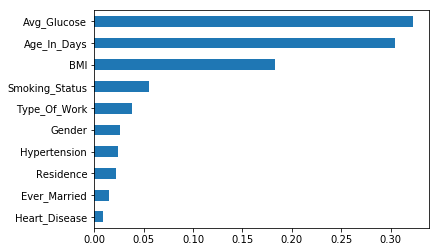

In [100]:
# Decision Tree
model = train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, random_state=0)

# plot feature importances
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()

In [101]:
# Check optimal 'max_depth' parameter
for i in range(1,6):
    print("max_depth = "+str(i))
    train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, max_depth=i, random_state=3400)

max_depth = 1
Train accuracy: 98.18%
Test accuracy: 98.24%
max_depth = 2
Train accuracy: 98.18%
Test accuracy: 98.24%
max_depth = 3
Train accuracy: 98.18%
Test accuracy: 98.24%
max_depth = 4
Train accuracy: 98.18%
Test accuracy: 98.23%
max_depth = 5
Train accuracy: 98.20%
Test accuracy: 98.22%


In [102]:
model = train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier,max_depth=3, random_state=3400)

Train accuracy: 98.18%
Test accuracy: 98.24%


###### Random Forests

Train accuracy: 99.52%
Test accuracy: 98.20%


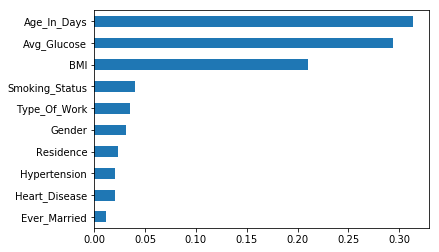

In [103]:
# Random Forests
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, random_state=3419)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()

Adding n_estimator to improve test accuracy:

In [104]:
# tuned Random Forests
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, n_estimators=143, random_state=3419)

Train accuracy: 100.00%
Test accuracy: 98.24%


###### Support Vector Machines 

In [105]:
# Support Vector Machines
model = train_model(X_train, y_train, X_test, y_test, SVC)

Train accuracy: 98.18%
Test accuracy: 98.24%


In [106]:
# tuned SVM
model = train_model(X_train, y_train, X_test, y_test, SVC, C=0.005, kernel='linear')

Train accuracy: 98.18%
Test accuracy: 98.24%


In [107]:
# trying with Gaussian kernel
model = train_model(X_train, y_train, X_test, y_test, SVC, C=0.005, kernel='rbf')

Train accuracy: 98.18%
Test accuracy: 98.24%


In [108]:
model = train_model(X_train, y_train, X_test, y_test, SVC, C=0.005, kernel='sigmoid')

Train accuracy: 98.18%
Test accuracy: 98.24%


In [118]:
svclassifier = SVC(kernel='poly', degree=10)  
svclassifier.fit(X_train, y_train)  
y_pred = svclassifier.predict(X_test)

In [119]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[12641   144]
 [  218    11]]
             precision    recall  f1-score   support

          0       0.98      0.99      0.99     12785
          1       0.07      0.05      0.06       229

avg / total       0.97      0.97      0.97     13014



###### Gaussian Naive Bayes

In [120]:
model = train_model(X_train, y_train, X_test, y_test, GaussianNB)

Train accuracy: 90.43%
Test accuracy: 90.35%


###### Logistic Regression

In [121]:
model = train_model(X_train, y_train, X_test, y_test, LogisticRegression)

Train accuracy: 98.18%
Test accuracy: 98.24%


In [122]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees','Random Forests', 'SVM','Gaussian Naive Bayes','Logistic Regression']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=4), DecisionTreeClassifier(max_depth=1, random_state=3419), RandomForestClassifier(n_estimators=70, random_state=3419),
           SVC(C=0.005, kernel='sigmoid'),GaussianNB(), LogisticRegression()]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy.append(score)

In [123]:
# create a dataframe from accuracy results
summary = pd.DataFrame({'Test_accuracy':accuracy}, index=classifiers)       
summary

,Test_accuracy
KNN,0.982096
Decision Trees,0.982404
Random Forests,0.982327
SVM,0.982404
Gaussian Naive Bayes,0.903489
Logistic Regression,0.982404
